<h1><a id='outline'>Project Outline</a></h1>

* [Libraries](#libs)
* [Initial Data exploration](#ide)
* [Homework 2 Questions PDF](#hw2qs)
* [References](#refs)
    * [Stormo Paper](#stormo)
    * [Monte Carlo notes](#mcmc)

# Libraries

In [1]:
%matplotlib inline
from Bio import motifs as Motifs # If this doesn't load: conda install -c bioconda biopython
from Bio.SeqIO import index
from IPython.display import display, Image
from math import log
from numpy import dot as dotp
from pandas import DataFrame
from scipy.stats import chi2
#from wand.image import Image as WImage #Comment this out if you don't need to display a NEW PDF
class valWrapper:
    def __init__(self,value): self.value=value
    def __getitem__(self, index): return float(self.value[index])
class dfWrapper():
    def __init__(self,df): self.df=df
    def __getitem__(self, key): return valWrapper(self.df[self.df.index==key])

<h2><a id="ide">Initial Data exploration</a></h2>

There are 3264 transcription factor binding site sequeneces


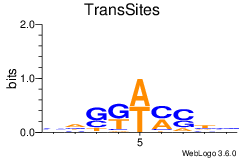

In [2]:
tfSites = index("transciptionFactorBindingMotifs.fasta","fasta")
print("There are %i transcription factor binding site sequeneces" % (len(tfSites)))
seqs = []
for seq in tfSites.values():seqs.append(str(seq.seq).upper())
motif = Motifs.create(seqs)
# print motif.counts.normalize()
motif.weblogo("tfSitesLogo.png",format='png',**{'logo_title':"TransSites",'show_ends':False,'unit_name':"",'stack_width':'large','show_errorbars':False})    
display(Image("tfSitesLogo.png"))

## Question 1a

In [3]:
motif.counts

{'G': [846, 700, 1768, 1736, 0, 215, 1010, 554, 1255],
 'A': [600, 1465, 82, 152, 1692, 1255, 483, 590, 608],
 'T': [608, 587, 476, 1177, 1572, 170, 92, 1475, 598],
 'C': [1210, 512, 938, 199, 0, 1624, 1679, 645, 803]}

In [3]:
pfm = DataFrame(motif.counts,index=range(1,10),columns=['A','C','G','T']).transpose()
pfm=pfm.reindex(['A','C','G','T'])
pwm = pfm/pfm.sum()

# or motif.pwm but dataframe displays prettier
pwm


,1,2,3,4,5,6,7,8,9
A,0.183824,0.448836,0.025123,0.046569,0.518382,0.384498,0.147978,0.18076,0.186275
C,0.370711,0.156863,0.287377,0.060968,0.000000,0.497549,0.514400,0.19761,0.246017
G,0.259191,0.214461,0.541667,0.531863,0.000000,0.065870,0.309436,0.16973,0.384498
T,0.186275,0.179841,0.145833,0.360600,0.481618,0.052083,0.028186,0.45190,0.183211


In [4]:
pwm = dfWrapper(pwm)

## Question 1b

<h4><a id="lho"></a>L(Ho)</h4>

In [5]:
from math import log
L_Ho = 0.0
for seq in seqs:
    for pos in range(1,10):
        L_Ho+= log(pwm[seq[pos-1]][pos])
print(L_Ho)

-33183.59287371202


<h4><a id="lha"></a>L(Ha)</h4>

In [17]:
from itertools import product as cartProduct
from pandas import Series
Ps = {}
#Initialize the Ps matrix
for pos in range(1,9):
    Ps[pos]={}
    for firstBase,secondBase in cartProduct(['A','C','G','T'],['A','C','G','T']):
        try: Ps[pos][firstBase][secondBase] = 0
        except: Ps[pos][firstBase] = {secondBase:0}

#Count the number of times each base is found together
for seq in seqs:
    for pos in range(0,8): Ps[pos+1][seq[pos]][seq[pos+1]]+=1

#Scale to make a PW transition matrix
transMat = {}
for pos in range(1,9):
    transMat[pos]={}
    for firstBase,secondBase in cartProduct(['A','C','G','T'],['A','C','G','T']):
        rc_total = Series(Ps[pos][firstBase]).sum()
        try: transMat[pos][firstBase][secondBase] = Ps[pos][firstBase][secondBase]/rc_total
        except: transMat[pos][firstBase] = {secondBase: Ps[pos][firstBase][secondBase]/rc_total}


/mnt/home/dooleys1/bin/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:21: RuntimeWarning: invalid value encountered in long_scalars
/mnt/home/dooleys1/bin/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:22: RuntimeWarning: invalid value encountered in long_scalars


In [14]:
L_Ha = 0.0
for seq in seqs:
    L_Ha += log(pwm[seq[0]][1])
    for pos in range(0,8):
        L_Ha += log(transMat[pos+1][seq[pos]][seq[pos+1]])
L_Ha

-24490.891541478286

In [15]:
L_Ho/L_Ha

1.354936091955313

In [9]:
lmbda = -2*(log(L_Ho/L_Ha))
lmbda

0.9482193303742563

In [11]:
print(1-chi2.pdf(lmbda,(3+12*8)-(9*3)))
chi2.pdf(lmbda,132-36)

1.0


7.025920990797918e-76

In [18]:
%%bash
git add HW2Notebook.ipynb
git commit -m "L_Ho/L_Ha"
git push

[master 225e1c1] L_Ho/L_Ha
 1 file changed, 38 insertions(+), 22 deletions(-)


CalledProcessError: Command 'b'git add HW2Notebook.ipynb\ngit commit -m "L_Ho/L_Ha"\ngit push 2>/dev/null\n'' returned non-zero exit status 128.

<h2><a id="hw2qs">Homework 2 Questions</a></h2>

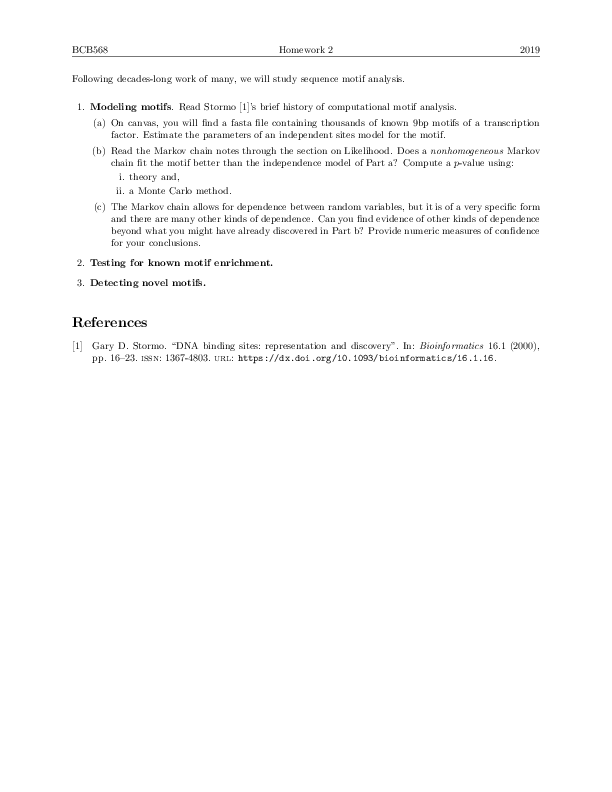

In [4]:
imageFromPdf = WImage(filename='HW2_AssignmentStatement.pdf')  
pages = len(imageFromPdf.sequence)  
image = WImage( width=imageFromPdf.width, height=imageFromPdf.height * pages)  
for i in range(pages):  image.composite(imageFromPdf.sequence[i], top=imageFromPdf.height * i, left=0)  
image.format="png"  
image 

<h4><a id="refs"><u>References</u></a></h4>

<h4><a id="stormo">1. Stromo Paper</a></h4>

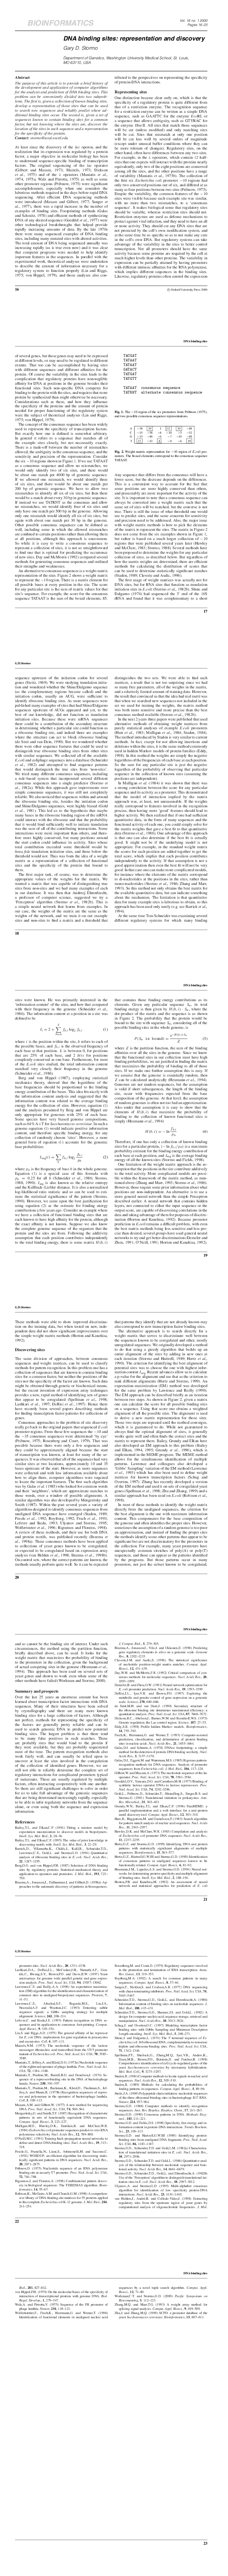

In [3]:
imageFromPdf = WImage(filename='Stormo_2000.pdf')  
pages = len(imageFromPdf.sequence)  
image = WImage( width=imageFromPdf.width, height=imageFromPdf.height * pages)  
for i in range(pages):  image.composite(imageFromPdf.sequence[i], top=imageFromPdf.height * i, left=0)  
image.format="png"  
image 

<h4><a id="mcmc">2. Markov Chain Notes</a></h4>

In [24]:
import numpy as np
P = np.array([[.4, .2,.2,.2],
              [.2, .4,.2,.2],
              [.2, .2,.4,.2],
              [.2, .2,.2,.4]])
p_sq = np.matmul(P, P)
p_sq

array([[0.28, 0.24, 0.24, 0.24],
       [0.24, 0.28, 0.24, 0.24],
       [0.24, 0.24, 0.28, 0.24],
       [0.24, 0.24, 0.24, 0.28]])

In [11]:
seqIndex = {'A':0,'C':1,'G':2,'T':3}

In [4]:
.25 * (.4**5)

0.0025600000000000006

In [16]:
seqIndex = {'A':0,'C':1,'G':2,'T':3}
def markovLikelihood(a_0,seq,P):
    likelihood = a_0*P[seqIndex[seq[0]]][seqIndex[seq[1]]]
    prevBase = seq[1]
    for base in seq[1:]:
        likelihood*=P[seqIndex[prevBase]][seqIndex[base]]
        prevBase=base
        return likelihood

In [17]:
seq1 = "AACGTAAAATTGCAGGGTTTGCT"
seq2 = "TACAGCGGGGCTCCTCCTAACCGCAACGAAAATGT"

likelihood = .25*.4
prevBase = "A"
for base in seq[1:]:
    likelihood*=P[seqIndex[prevBase]][seqIndex[base]]
    prevBase=base
    #print(base,end="")

In [20]:
markovLikelihood(.25,seq1,P)*markovLikelihood(.25,seq2,P)

0.0008000000000000004

In [25]:
P*P

array([[0.16, 0.04, 0.04, 0.04],
       [0.04, 0.16, 0.04, 0.04],
       [0.04, 0.04, 0.16, 0.04],
       [0.04, 0.04, 0.04, 0.16]])